# 이미지가 픽셀 그리드다

In [4]:
%pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

%matplotlib inline


image shape: (640, 1280, 3)


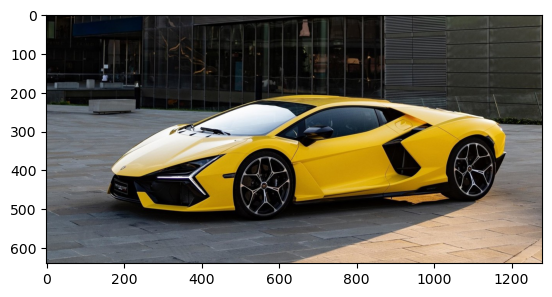

In [17]:
# 이미지 표시
image =mpimg.imread('39979_237158_1919.jpg')

#이미지 크기
print('image shape:', image.shape)
plt.imshow(image)
plt.show()

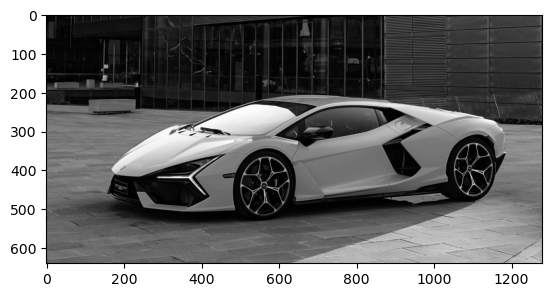

In [19]:
# grayscale 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')
plt.show()

In [20]:
#아무 픽셀 값을 출력합니다
x, y =100, 100
print('Pixel value at (100, 100):', gray[x,y])

#픽셀 값의 범위
print('Pixel value range:', gray.min(), 'to', gray.max())

#픽셀 값의 평균과 표준편차
print('Pixel value mean:', gray.mean())
print('Pixel value std:', gray.std())


Pixel value at (100, 100): 6
Pixel value range: 0 to 255
Pixel value mean: 79.12309814453126
Pixel value std: 62.68203158142641


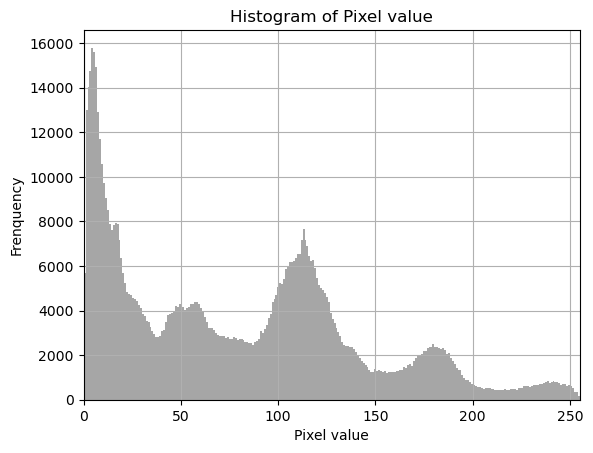

In [21]:
#픽셀 값의 히스토그램을 그립니다
plt.hist(gray.ravel(), bins = 256, range=(gray.min(), gray.max()), color = 'gray', alpha = 0.7)
plt.title('Histogram of Pixel value')
plt.xlabel('Pixel value')
plt.ylabel('Frenquency')
plt.xlim(gray.min(), gray.max())
plt.grid()
plt.show()

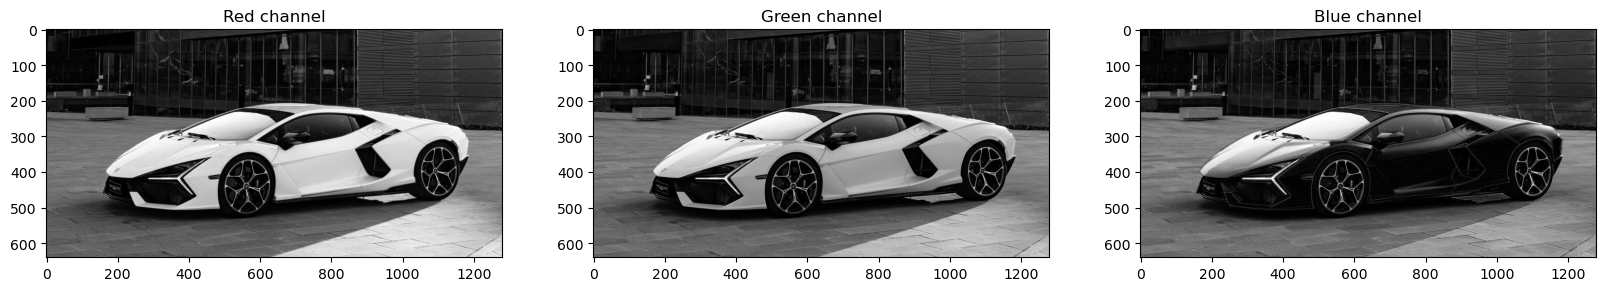

In [32]:
#RGB 채널 분리
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]
fig, (ax1,ax2,ax3) =plt.subplots(1,3,figsize=(20,10))

ax1.imshow(r,cmap ='gray')
ax1.set_title('Red channel')

ax2.imshow(g,cmap='gray')
ax2.set_title('Green channel')


ax3.imshow(b, cmap='gray')
ax3.set_title('Blue channel')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

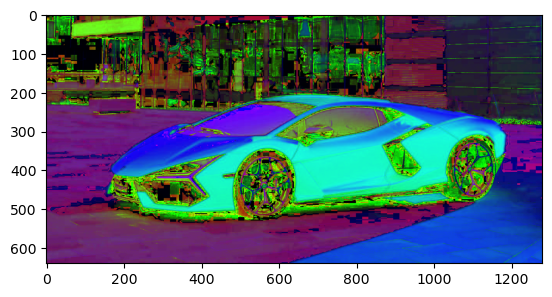

In [26]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.show

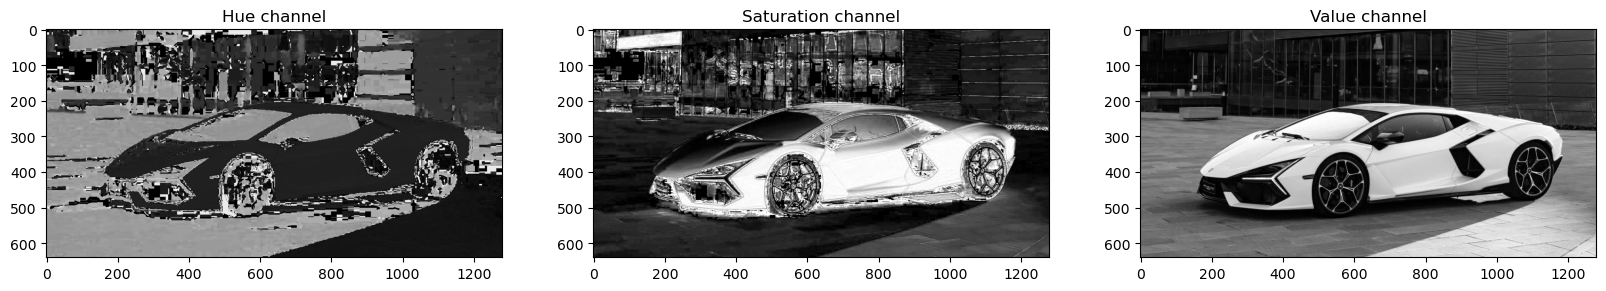

In [31]:
#RGB 채널 분리
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]
fig, (ax1,ax2,ax3) =plt.subplots(1,3,figsize=(20,10))

ax1.imshow(h,cmap ='gray')
ax1.set_title('Hue channel')

ax2.imshow(s,cmap='gray')
ax2.set_title('Saturation channel')


ax3.imshow(v, cmap='gray')
ax3.set_title('Value channel')

plt.show()

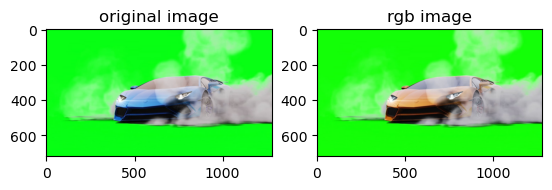

In [37]:
# green screen
green_screen = cv2.imread('maxresdefault.jpg')
green_screen_rgb = cv2.cvtColor(green_screen, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(green_screen)
plt.title('original image')

plt.subplot(1,2,2)
plt.imshow(green_screen_rgb)
plt.title('rgb image')
plt.show()

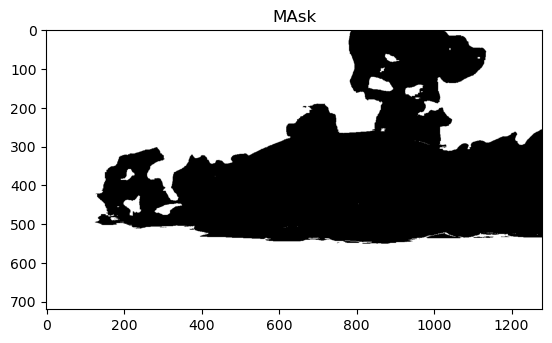

In [38]:
#임계값 설정
lower_green  = np.array([0,100,0])
upper_green = np.array([100,255,100])

#마스크 생성
mask = cv2.inRange(green_screen_rgb, lower_green, upper_green)
plt.imshow(mask,cmap='gray')
plt.title('MAsk')
plt.show()

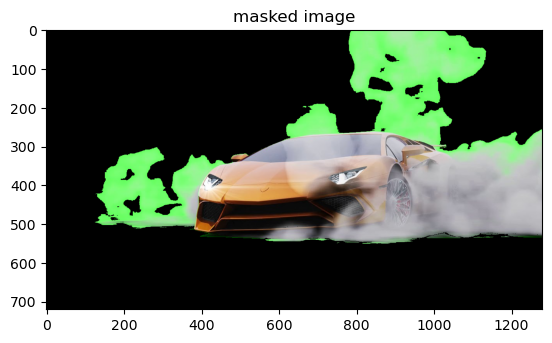

In [40]:
#마스크 사용 후 배경 제거

masked_img = np.copy(green_screen_rgb)
masked_img[mask != 0] = [0,0,0]
plt.imshow(masked_img)
plt.title('masked image')
plt.show()